# Chapter - 1: EDA

This is an exploratory data analysis on the House Prices Kaggle Competition found at

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


## Estimatses of Location like median , mean

In [2]:
import pandas as pd

In [10]:
titanic = pd.read_csv("train_titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
# mean
titanic['Fare'].mean()

32.2042079685746

In [32]:
# trimmed mean
from scipy.stats import trim_mean
trim_mean(titanic['Fare'],0.1)

21.37871556802244

In [36]:
# weighted mean

import numpy as np

np.average(titanic['Fare'],weights=titanic['Survived'])

48.39540760233918

Those who survived have an average fare price of 48.39

In [37]:
#Median

titanic['Fare'].median()

14.4542

In [44]:
# weighted median
# !pip install wquantiles 
import wquantiles
wquantiles.median(titanic['Fare'],weights=titanic['Survived'])


26.0

## Estimates of Variability (like Variance)

In [56]:
#variance
from statistics import variance
variance(titanic['Fare'])

2469.4368457431165

In [46]:
titanic['Fare'].std()

49.693428597180905

In [47]:
titanic['Fare'].quantile(0.75)

31.0

In [54]:
titanic['Fare'].quantile(0.75)-titanic['Fare'].quantile(0.25)

23.0896

In [55]:
np.percentile(titanic['Fare'],75)

31.0

In [52]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# mean absolute deviation

np.mean(np.abs(np.mean(titanic['Fare'])-titanic['Fare']))

28.16369184877832

## Exploring Data Distribution (such as graph)

In [58]:
# percentile graph
titanic['Fare'].quantile([0.05,0.25,0.5,0.75,0.95])


0.05      7.22500
0.25      7.91040
0.50     14.45420
0.75     31.00000
0.95    112.07915
Name: Fare, dtype: float64

<AxesSubplot:>

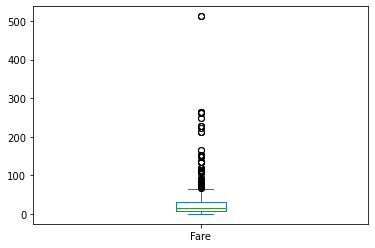

In [62]:
# boxplot
from matplotlib.pyplot import plot
(titanic['Fare']).plot.box()

In [73]:
pd.qcut(titanic['Fare'],4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

<AxesSubplot:ylabel='Frequency'>

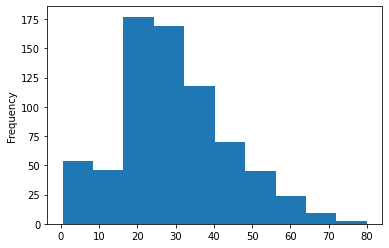

In [80]:
(titanic['Age']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

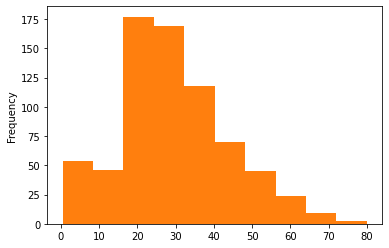

In [95]:
ax=(titanic['Age']).plot.hist(density=True)
titanic['Age'].plot.hist(ax=ax)

In [96]:
#binary and categorical data
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

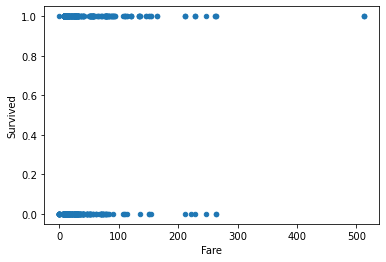

In [103]:
titanic.plot.scatter(x='Fare',y='Survived')

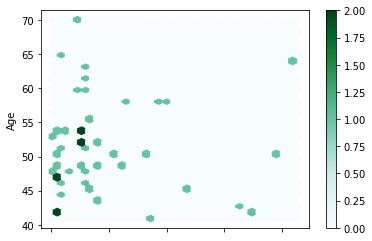

In [108]:
titanic_df = titanic.loc[(titanic.Age>40)&(titanic.Fare>50),:]
ax = titanic_df.plot.hexbin(x='Fare', y='Age',
gridsize=30)